In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx
from mpl_toolkits.mplot3d import Axes3D

In [2]:
P = 1 / 8 * np.array([[7, np.sqrt(3)], [np.sqrt(3), 5]])

<a list of 9 text.Text objects>

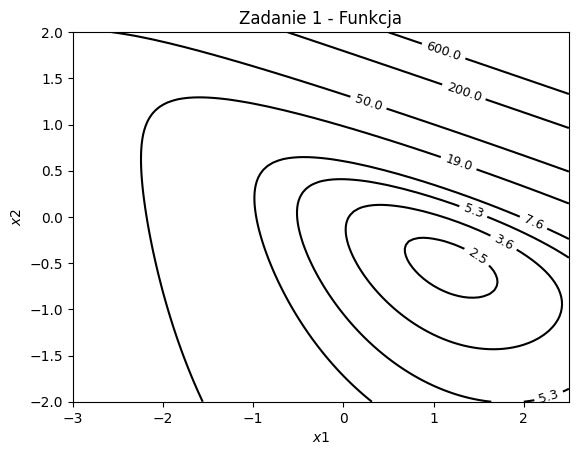

In [3]:
# Zadanie 1 - funkcja
X1 = np.linspace(-3, 2.5, 100)
X2 = np.linspace(-2, 2, 100)
x1, x2 = np.meshgrid(X1, X2)
f = np.exp(x1 + 3 * x2 - 0.1) + np.exp(-x1 - 0.1) + 1/8 * ((-1 + x1) * (7 * (-1 + x1) + np.sqrt(3) * (-1 + x2)) + (np.sqrt(3) * (-1 + x1) + 5 * (-1 + x2)) * (-1 + x2))
a = plt.contour(x1, x2, f, [2.5, 3.62, 5.34, 7.59, 19, 50, 200, 600], colors='k')
plt.title("Zadanie 1 - Funkcja")
plt.xlabel("$x1$")
plt.ylabel("$x2$")
plt.clabel(a, fontsize=9, inline=True)

In [4]:
# Zadanie 1 - zmienne

def f_func(x1_, x2_):
    return np.exp(x1_ + 3 * x2_ - 0.1) + np.exp(-x1_ - 0.1) + 1/8 * ((-1 + x1_) * (7 * (-1 + x1_) + np.sqrt(3) * (-1 + x2_)) + (np.sqrt(3) * (-1 + x1_) + 5 * (-1 + x2_)) * (-1 + x2_))

def g(x1_, x2_):
    return np.array([
        -np.exp(-0.1 - x1_) + np.exp(-0.1 + x1_ + 3 * x2_) + 1/8 * (14 * (-1 + x1_) + 2 * np.sqrt(3) * (-1 + x2_)),
         3 * np.exp(-0.1 + x1_ + 3 * x2_) + 1/8 * (2 * np.sqrt(3) * (-1 + x1_) + 10 * (-1 + x2_))
    ])

def hess(x1_, x2_):
    return np.array([
        [7/4 + np.exp(-0.1 - x1_) + np.exp(-0.1 + x1_ + 3 * x2_), np.sqrt(3)/4 + 3 * np.exp(-0.1 + x1_ + 3 * x2_)],
        [np.sqrt(3)/4 + 3 * np.exp(-0.1 + x1_ + 3 * x2_), 5/4 + 9 * np.exp(-0.1 + x1_ + 3 * x2_)]
    ])              

def v(x1_, x2_):
    return -np.linalg.inv(hess(x1_, x2_)) @ g(x1_, x2_)

In [5]:
# Zadanie 1 - Klasyczna metoda Newtona

x = np.array([2, -2])
x_path = []
delta = -g(*x).transpose() @ v(*x)
epsilon = 1e-4
while delta > epsilon:
    x_path.append(x)
    x = x + v(*x)
    delta = -g(*x).transpose() @ v(*x)

x_path = np.array(x_path)
print(f"Steps: {x_path.shape[0]}\nx_optimal = {x}")

Steps: 7
x_optimal = [ 1.18742946 -0.52753609]


Text(0, 0.5, '$x2$')

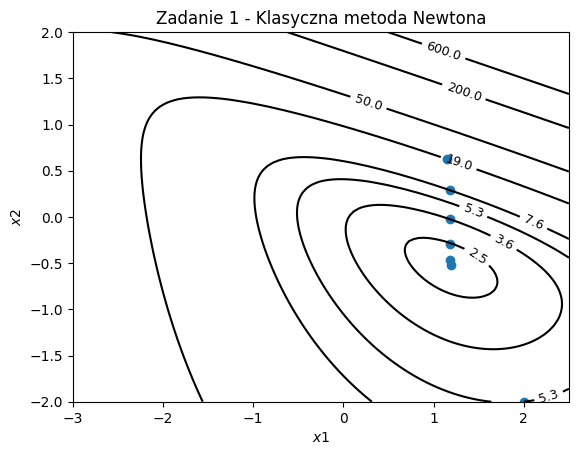

In [6]:
# Zadanie 1 - Klasyczna metoda Newtona - wykres

X1 = np.linspace(-3, 2.5, 100)
X2 = np.linspace(-2, 2, 100)
x1, x2 = np.meshgrid(X1, X2)
f = np.exp(x1 + 3 * x2 - 0.1) + np.exp(-x1 - 0.1) + 1/8 * ((-1 + x1) * (7 * (-1 + x1) + np.sqrt(3) * (-1 + x2)) + (np.sqrt(3) * (-1 + x1) + 5 * (-1 + x2)) * (-1 + x2))
a = plt.contour(x1, x2, f, [2.5, 3.62, 5.34, 7.59, 19, 50, 200, 600], colors='k')
plt.scatter(x_path[:, 0], x_path[:, 1])
plt.title("Zadanie 1 - Klasyczna metoda Newtona")
plt.clabel(a, fontsize=9, inline=True)
plt.xlabel("$x1$")
plt.ylabel("$x2$")

In [7]:
# Zadanie 1 - Metoda Newtona z tłumieniem

x = np.array([2, -2])
x_path = []
delta = -g(*x).transpose() @ v(*x)
epsilon = 1e-4
alpha = beta = 0.5
x_path = []

while delta > epsilon:
    x_path.append(x)
    s = 1
    while f_func(*(x + s * v(*x))) > f_func(*x) + s * alpha * g(*x).transpose() @ v(*x):
        s *= beta
    x = x + s * v(*x)
    delta = -g(*x).transpose() @ v(*x)
    
x_path = np.array(x_path)
print(f"Steps: {x_path.shape[0]}\nx_optimal = {x}")

Steps: 7
x_optimal = [ 1.19316381 -0.52988818]


Text(0, 0.5, '$x2$')

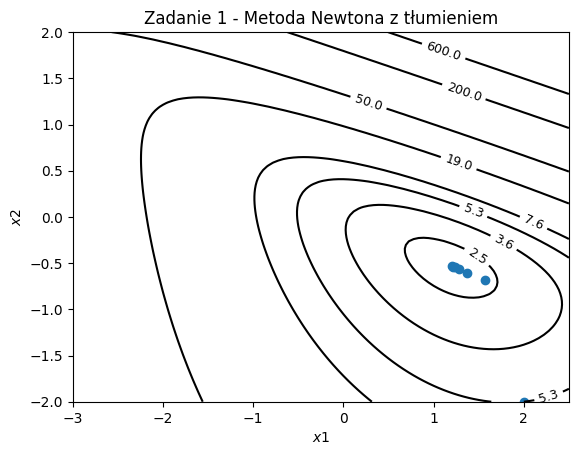

In [8]:
# Zadanie 1 - Metoda Newtona z tłumieniem - wykres

X1 = np.linspace(-3, 2.5, 100)
X2 = np.linspace(-2, 2, 100)
x1, x2 = np.meshgrid(X1, X2)
f = np.exp(x1 + 3 * x2 - 0.1) + np.exp(-x1 - 0.1) + 1/8 * ((-1 + x1) * (7 * (-1 + x1) + np.sqrt(3) * (-1 + x2)) + (np.sqrt(3) * (-1 + x1) + 5 * (-1 + x2)) * (-1 + x2))
a = plt.contour(x1, x2, f, [2.5, 3.62, 5.34, 7.59, 19, 50, 200, 600], colors='k')
plt.scatter(x_path[:, 0], x_path[:, 1])
plt.clabel(a, fontsize=9, inline=True)
plt.title("Zadanie 1 - Metoda Newtona z tłumieniem")
plt.xlabel("$x1$")
plt.ylabel("$x2$")

/tmp/ipykernel_91129/3051816857.py:6: RuntimeWarning: invalid value encountered in log
  f = t * (np.exp(x1 + 3 * x2 - 0.1) + np.exp(-x1 - 0.1)) - np.log(1 - (1/8 * ((-1 + x1) * (7 * (-1 + x1) + np.sqrt(3) * (-1 + x2)) + (np.sqrt(3) * (-1 + x1) + 5 * (-1 + x2)) * (-1 + x2))))


Text(0, 0.5, '$x2$')

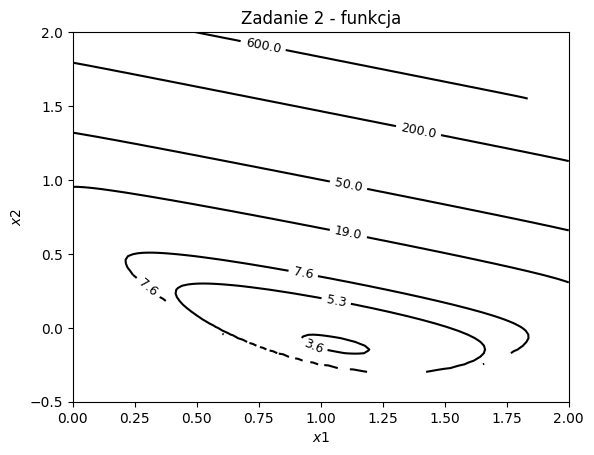

In [10]:
# Zadanie 2 - funkcja
X1 = np.linspace(-0, 2, 100)
X2 = np.linspace(-0.5, 2, 100)
x1, x2 = np.meshgrid(X1, X2)
t = 1
f = t * (np.exp(x1 + 3 * x2 - 0.1) + np.exp(-x1 - 0.1)) - np.log(1 - (1/8 * ((-1 + x1) * (7 * (-1 + x1) + np.sqrt(3) * (-1 + x2)) + (np.sqrt(3) * (-1 + x1) + 5 * (-1 + x2)) * (-1 + x2))))
a = plt.contour(x1, x2, f, [2.5, 3.62, 5.34, 7.59, 19, 50, 200, 600], colors='k')
# plt.scatter(x_path[:, 0], x_path[:, 1])
plt.clabel(a, fontsize=9, inline=True)
plt.title("Zadanie 2 - Funkcja")
plt.xlabel("$x1$")
plt.ylabel("$x2$")

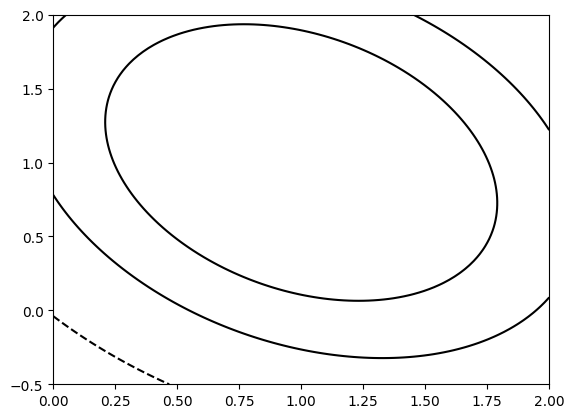

In [11]:
plt.contour(x1, x2, 1 - (1/8 * ((-1 + x1) * (7 * (-1 + x1) + np.sqrt(3) * (-1 + x2)) + (np.sqrt(3) * (-1 + x1) + 5 * (-1 + x2)) * (-1 + x2))), [-1, 0, 0.5], colors='k')

In [12]:
# Zadanie 2 - zmienne

def f_func(x1_, x2_):
    return t * (np.exp(x1_ + 3 * x2_ - 0.1) + np.exp(-x1_ - 0.1)) - np.log(1 - (1/8 * ((-1 + x1_) * (7 * (-1 + x1_) + np.sqrt(3) * (-1 + x2_)) + (np.sqrt(3) * (-1 + x1_) + 5 * (-1 + x2_)) * (-1 + x2_))))


def g(x1_, x2_):
    x_vec = np.array([x1_, x2_])
    xc = np.array([1, 1])
    return t * np.array([
        -np.exp(-0.1 - x1_) + np.exp(-0.1 + x1_ + 3 * x2_),
         3 * np.exp(-0.1 + x1_ + 3 * x2_)
    ]) + (2 * P @ (x_vec - xc)) / (1 - (x_vec - xc).transpose() @ P @ (x_vec - xc))
    

def hess(x1_, x2_):
    x_vec = np.array([x1_, x2_])
    xc = np.array([1, 1])
    return t * np.array([
        [np.exp(-0.1 - x1_) + np.exp(-0.1 + x1_ + 3 * x2_), 3 * np.exp(-0.1 + x1_ + 3 * x2_)],
        [3 * np.exp(-0.1 + x1_ + 3 * x2_), 9 * np.exp(-0.1 + x1_ + 3 * x2_)]
    ]) + (2 * P) / (1 - (x_vec - xc).transpose() @ P @ (x_vec - xc)) + (4 * P @ (x_vec - xc) * (x_vec - xc).transpose() @ P) / ((1 - (x_vec - xc).transpose() @ P @ (x_vec - xc)) * (1 - (x_vec - xc).transpose() @ P @ (x_vec - xc)))

def v(x1_, x2_):
    return -np.linalg.inv(hess(x1_, x2_)) @ g(x1_, x2_)

Steps: 5
x_optimal = [1.02112377 0.22961442]


/tmp/ipykernel_91129/3276550448.py:25: RuntimeWarning: invalid value encountered in log
  f = t * (np.exp(x1 + 3 * x2 - 0.1) + np.exp(-x1 - 0.1)) - np.log(1 - (1/8 * ((-1 + x1) * (7 * (-1 + x1) + np.sqrt(3) * (-1 + x2)) + (np.sqrt(3) * (-1 + x1) + 5 * (-1 + x2)) * (-1 + x2))))


Text(0, 0.5, '$x2$')

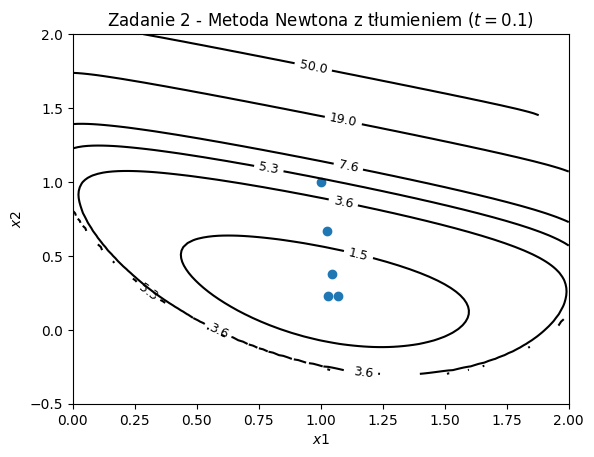

In [13]:
# Zadanie 2 - Metoda Newtona z tłumieniem (t=0.1)

t = 0.1
x = np.array([1, 1])
x_path = []
delta = -g(*x).transpose() @ v(*x)
epsilon = 1e-4
alpha = beta = 0.5
x_path = []

while delta > epsilon:
    x_path.append(x)
    s = 1
    while f_func(*(x + s * v(*x))) > f_func(*x) + s * alpha * g(*x).transpose() @ v(*x):
        s *= beta
    x = x + s * v(*x)
    delta = -g(*x).transpose() @ v(*x)
    
x_path = np.array(x_path)
print(f"Steps: {x_path.shape[0]}\nx_optimal = {x}")

X1 = np.linspace(-0, 2, 100)
X2 = np.linspace(-0.5, 2, 100)
x1, x2 = np.meshgrid(X1, X2)
f = t * (np.exp(x1 + 3 * x2 - 0.1) + np.exp(-x1 - 0.1)) - np.log(1 - (1/8 * ((-1 + x1) * (7 * (-1 + x1) + np.sqrt(3) * (-1 + x2)) + (np.sqrt(3) * (-1 + x1) + 5 * (-1 + x2)) * (-1 + x2))))
a = plt.contour(x1, x2, f, [1.5, 3.62, 5.34, 7.59, 19, 50, 200, 600], colors='k')
plt.scatter(x_path[:, 0], x_path[:, 1])
plt.clabel(a, fontsize=9, inline=True)
plt.title("Zadanie 2 - Metoda Newtona z tłumieniem ($t=0.1$)")
plt.xlabel("$x1$")
plt.ylabel("$x2$")

Steps: 9
x_optimal = [ 1.06112148 -0.11591182]


/tmp/ipykernel_91129/211160261.py:26: RuntimeWarning: invalid value encountered in log
  f = t * (np.exp(x1 + 3 * x2 - 0.1) + np.exp(-x1 - 0.1)) - np.log(1 - (1/8 * ((-1 + x1) * (7 * (-1 + x1) + np.sqrt(3) * (-1 + x2)) + (np.sqrt(3) * (-1 + x1) + 5 * (-1 + x2)) * (-1 + x2))))


Text(0, 0.5, '$x2$')

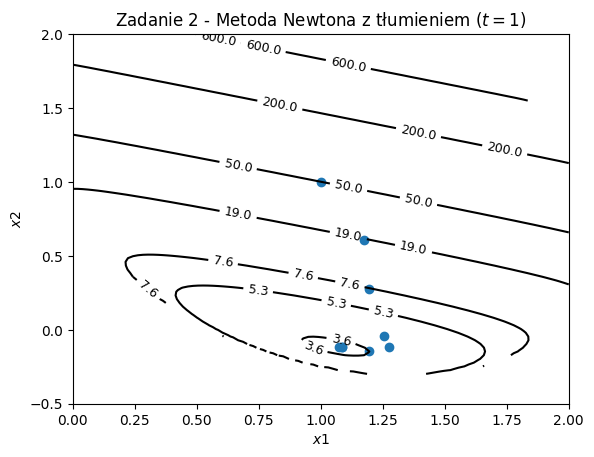

In [14]:
# Zadanie 2 - Metoda Newtona z tłumieniem (t=1)

t = 1
x = np.array([1, 1])
x_path = []
delta = -g(*x).transpose() @ v(*x)
epsilon = 1e-4
alpha = beta = 0.5
x_path = []

while delta > epsilon:
    x_path.append(x)
    s = 1
    while f_func(*(x + s * v(*x))) > f_func(*x) + s * alpha * g(*x).transpose() @ v(*x):
        s *= beta
    x = x + s * v(*x)
    delta = -g(*x).transpose() @ v(*x)
    
x_path = np.array(x_path)
print(f"Steps: {x_path.shape[0]}\nx_optimal = {x}")

X1 = np.linspace(-0, 2, 100)
X2 = np.linspace(-0.5, 2, 100)
x1, x2 = np.meshgrid(X1, X2)

f = t * (np.exp(x1 + 3 * x2 - 0.1) + np.exp(-x1 - 0.1)) - np.log(1 - (1/8 * ((-1 + x1) * (7 * (-1 + x1) + np.sqrt(3) * (-1 + x2)) + (np.sqrt(3) * (-1 + x1) + 5 * (-1 + x2)) * (-1 + x2))))
a = plt.contour(x1, x2, f, [1.5, 3.62, 5.34, 7.59, 19, 50, 200, 600], colors='k')
plt.scatter(x_path[:, 0], x_path[:, 1])
plt.clabel(a, fontsize=9, inline=True)
plt.title("Zadanie 2 - Metoda Newtona z tłumieniem ($t=1$)")
plt.clabel(a, fontsize=9, inline=True)
plt.xlabel("$x1$")
plt.ylabel("$x2$")

[1.67644736 0.44127541]
180.90570446207033
[1.70508532 0.09957437]
64.01282957705446
[ 1.75339319 -0.23880941]
243.37967542478052
[ 5.60321788 -3.00605352]
6.643928995643586
[19.31828046 -8.58760355]
9.617014713696483
[105.20044958 -44.9405318 ]
0.08871745294203243
[129.0973433  207.49352977]
nan
Steps: 7
x_optimal = [129.0973433  207.49352977]


/tmp/ipykernel_91129/2272868287.py:4: RuntimeWarning: invalid value encountered in log
  return t * (np.exp(x1_ + 3 * x2_ - 0.1) + np.exp(-x1_ - 0.1)) - np.log(1 - (1/8 * ((-1 + x1_) * (7 * (-1 + x1_) + np.sqrt(3) * (-1 + x2_)) + (np.sqrt(3) * (-1 + x1_) + 5 * (-1 + x2_)) * (-1 + x2_))))
/tmp/ipykernel_91129/2272868287.py:4: RuntimeWarning: overflow encountered in exp
  return t * (np.exp(x1_ + 3 * x2_ - 0.1) + np.exp(-x1_ - 0.1)) - np.log(1 - (1/8 * ((-1 + x1_) * (7 * (-1 + x1_) + np.sqrt(3) * (-1 + x2_)) + (np.sqrt(3) * (-1 + x1_) + 5 * (-1 + x2_)) * (-1 + x2_))))
/tmp/ipykernel_91129/2272868287.py:11: RuntimeWarning: overflow encountered in exp
  -np.exp(-0.1 - x1_) + np.exp(-0.1 + x1_ + 3 * x2_),
/tmp/ipykernel_91129/2272868287.py:12: RuntimeWarning: overflow encountered in exp
  3 * np.exp(-0.1 + x1_ + 3 * x2_)
/tmp/ipykernel_91129/2272868287.py:20: RuntimeWarning: overflow encountered in exp
  [np.exp(-0.1 - x1_) + np.exp(-0.1 + x1_ + 3 * x2_), 3 * np.exp(-0.1 + x1_ + 3 * x2_)],


<a list of 4 text.Text objects>

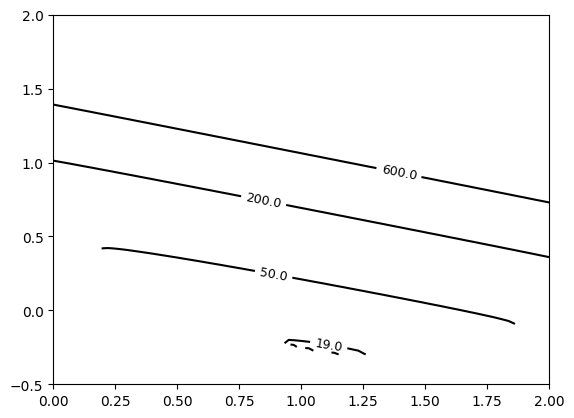

In [15]:
t = 10
x = np.array([1, 1])
x_path = []
delta = -g(*x).transpose() @ v(*x)
epsilon = 1e-4
alpha = 0.3
beta = 0.8
x_path = []

while delta > epsilon:
    
    x_path.append(x)
    s = 1
    while f_func(*(x + s * v(*x))) > f_func(*x) + s * alpha * g(*x).transpose() @ v(*x):
        s *= beta
    x = x + s * v(*x)
    delta = -g(*x).transpose() @ v(*x)
    print(x)
    print(delta)
    
x_path = np.array(x_path)
print(f"Steps: {x_path.shape[0]}\nx_optimal = {x}")

X1 = np.linspace(-0, 2, 100)
X2 = np.linspace(-0.5, 2, 100)
x1, x2 = np.meshgrid(X1, X2)

f = t * (np.exp(x1 + 3 * x2 - 0.1) + np.exp(-x1 - 0.1)) - np.log(1 - (1/8 * ((-1 + x1) * (7 * (-1 + x1) + np.sqrt(3) * (-1 + x2)) + (np.sqrt(3) * (-1 + x1) + 5 * (-1 + x2)) * (-1 + x2))))
a = plt.contour(x1, x2, f, [1.5, 3.62, 5.34, 7.59, 19, 50, 200, 600], colors='k')
# plt.scatter(x_path[:, 0], x_path[:, 1])
plt.clabel(a, fontsize=9, inline=True)

In [16]:
g(*[129.0973433 - 1,  207.49352977 - 1])

/tmp/ipykernel_91129/2272868287.py:11: RuntimeWarning: overflow encountered in exp
  -np.exp(-0.1 - x1_) + np.exp(-0.1 + x1_ + 3 * x2_),
/tmp/ipykernel_91129/2272868287.py:12: RuntimeWarning: overflow encountered in exp
  3 * np.exp(-0.1 + x1_ + 3 * x2_)


array([inf, inf])

In [17]:
 (1 - (np.array([129.0973433 - 1,  207.49352977 - 1])).transpose() @ P @ (np.array([129.0973433 - 1,  207.49352977 - 1])))

-52460.28634346515

In [18]:
np.exp(-0.1 + (129.0973433 - 1) + 3 * (207.49352977 - 1))

/tmp/ipykernel_91129/3354179439.py:1: RuntimeWarning: overflow encountered in exp
  np.exp(-0.1 + (129.0973433 - 1) + 3 * (207.49352977 - 1))


inf